 1. 1차원데이터분석

 2. 변수종류파악( 수치형/ 범주형/ 시간형)

 3. 변수종류별분석지표( 수치형/ 범주형/ 시간형)

 4. 시각화

도수분포표/ 히스토그램/ 상자그림

2. 2차원데이터분석

1. 공분산/ 상관계수

2. 다중공선성확인

3. 시각화

산점도/ 회귀직선/ 히트맵
출처 : https://www.kaggle.com/datasets/pitterman/airline-stats

airline : 항공사
carrier_deay : 항공사 지연 요인
atc_delay : ATC 항공교통관제 지연 요인
weather_delay : 날씨로 인한 지연 요인

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


df=pd.read_csv('airline_stats.csv')
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


# 1차원 데이터 분석

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33468 entries, 0 to 33467
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pct_carrier_delay  33440 non-null  float64
 1   pct_atc_delay      33440 non-null  float64
 2   pct_weather_delay  33440 non-null  float64
 3   airline            33468 non-null  object 
dtypes: float64(3), object(1)
memory usage: 1.0+ MB


In [3]:
df.select_dtypes(include='number')

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
0,8.153226,1.971774,0.762097
1,5.959924,3.706107,1.585878
2,7.157270,2.706231,2.026706
3,12.100000,11.033333,0.000000
4,7.333333,3.365591,1.774194
...,...,...,...
33463,6.186422,8.798491,1.651940
33464,9.522167,3.591133,0.261084
33465,9.164179,2.664179,0.343284
33466,5.152293,1.964520,0.122817


In [4]:
df.select_dtypes(include='object').head()

,airline
0,American
1,American
2,American
3,American
4,American


In [5]:
#df.max()        #열마다 최대값 구하기
#df.max(axis=1)  #행마다 최대값 구하기
df['pct_weather_delay'].max()  #특정 열의 최대값 구하기

np.float64(33.3333333333333)

In [6]:
#수치형변수의 최대/최소/대표값보기
#df.max()
#df.min()
#df.mean()
#df.median()
#df.mode()
df.describe()


,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [7]:
#범주형 변수의 값목록
#df['airline'].unique()  #목록만
df['airline'].value_counts()   #목록에 해당하는 값까지

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

In [8]:
#항공사명 기술통계 비교
df.groupby('airline').describe().T          ####속성별로 보기

airline                       Alaska     American        Delta     Jet Blue  \
pct_carrier_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      3.521889     9.042180     6.333460     8.081843   
                  std       2.483224     4.139067     4.695292     3.797737   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.935484     6.338538     3.813989     5.341176   
                  50%       3.225806     8.428571     5.548387     7.657895   
                  75%       4.685599    10.988763     7.821952    10.280000   
                  max      22.290323    50.000000   100.000000    28.000000   
pct_atc_delay     count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      5.472672     5.993529     4.462978     7.345231   
                  std       5.699303     4.647170     4.364335     5.227372   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       1.878614     3.108403     1.818182     3.784314   
                  50%       3.776860     4.986523     3.508108     6.136905   
                  75%       7.001330     7.594450     5.839901     9.612903   
                  max      54.838710    60.000000   100.000000    40.986111   
pct_weather_delay count  3851.000000  5723.000000  9095.000000  3773.000000   
                  mean      0.513497     1.122920     0.680765     0.465327   
                  std       1.136494     1.097811     1.093255     0.764147   
                  min       0.000000     0.000000     0.000000     0.000000   
                  25%       0.000000     0.296719     0.000000     0.000000   
                  50%       0.000000     0.884354     0.316406     0.157312   
                  75%       0.497395     1.641725     0.893346     0.666667   
                  max      14.633803    12.500000    20.500000     9.923077   

airline                    Southwest       United  
pct_carrier_delay count  5584.000000  5414.000000  
                  mean      7.521997     7.398833  
                  std       3.345085     5.369283  
                  min       0.000000     0.000000  
                  25%       5.070294     4.034708  
                  50%       6.960930     6.445210  
                  75%       9.354839     9.633110  
                  max      24.800000   100.000000  
pct_atc_delay     count  5584.000000  5414.000000  
                  mean      3.147019     5.348133  
                  std       2.513162     4.992464  
                  min       0.000000     0.000000  
                  25%       1.612527     2.431308  
                  50%       2.559242     4.353647  
                  75%       3.790421     7.030109  
                  max      21.542722   100.000000  
pct_weather_delay count  5584.000000  5414.000000  
                  mean      0.512611     0.680697  
                  std       0.649631     1.338433  
                  min       0.000000     0.000000  
                  25%       0.105675     0.000000  
                  50%       0.305598     0.263780  
                  75%       0.663306     0.861395  
                  max       6.240987    33.333333

# 변수종류파악( 수치형/ 범주형)

In [9]:
df.dtypes

pct_carrier_delay    float64
pct_atc_delay        float64
pct_weather_delay    float64
airline               object
dtype: object

In [10]:
# 수치형 변수만 선택
numeric_cols = df.select_dtypes(include='number').columns.tolist()
numeric_cols

['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']

In [11]:
# 범주형 변수만 선택
categorical_cols = df.select_dtypes(include='object').columns.tolist()
categorical_cols

['airline']

# 3. 변수종류별분석지표( 수치형/ 범주형)

In [12]:
#수지형 변수 분석지표

df.describe()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay
count,33440.000000,33440.000000,33440.000000
mean,7.041475,5.089962,0.684776
std,4.497596,4.718647,1.073743
min,0.000000,0.000000,0.000000
25%,4.145455,2.146565,0.000000
50%,6.356893,3.900000,0.316002
75%,9.140474,6.630238,0.935161
max,100.000000,100.000000,33.333333


In [13]:
#범주형 변수 분석지표

df['airline'].value_counts()
#df['airline'].value_counts(normalize=True)   #비율로 확인

airline
Delta        9107
American     5725
Southwest    5584
United       5426
Alaska       3851
Jet Blue     3775
Name: count, dtype: int64

# 4.시각화

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import matplotlib.font_manager as fm
for i in fm.fontManager.ttflist:
    if i.name.find('Gulim') !=-1:
        print(i.name)
        
        
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'

Gulim
New Gulim


In [16]:
#결측치 확인 및 제거 후 업데이트

# 각 컬럼별 결측치 개수 확인
print("컬럼별 결측치 개수:")
print(df.isnull().sum())


#결측치를 제거하여 정확도를 높임
df.dropna(inplace=True)



컬럼별 결측치 개수:
pct_carrier_delay    28
pct_atc_delay        28
pct_weather_delay    28
airline               0
dtype: int64


In [17]:
df.isnull().sum()       #결측치 제거 확인

pct_carrier_delay    0
pct_atc_delay        0
pct_weather_delay    0
airline              0
dtype: int64

# 항공사별 지연 요인 히스토그램

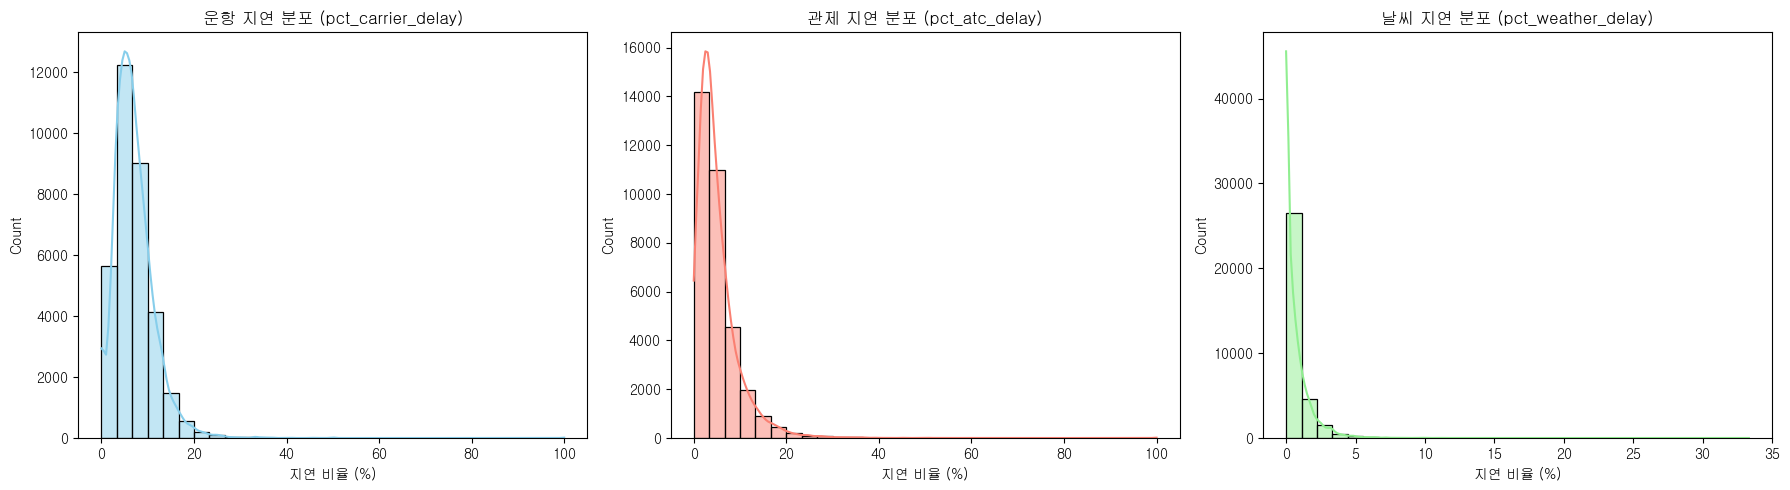

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# 1. 운항 지연
plt.subplot(1, 3, 1)
sns.histplot(df['pct_carrier_delay'], bins=30, kde=True, color='skyblue')  #kde=True를 주면, 그 위에 부드러운 곡선 형태의 분포 곡선이 나타남
plt.title('운항 지연 분포 (pct_carrier_delay)')
plt.xlabel('지연 비율 (%)')

# 2. 관제 지연
plt.subplot(1, 3, 2)
sns.histplot(df['pct_atc_delay'], bins=30, kde=True, color='salmon')
plt.title('관제 지연 분포 (pct_atc_delay)')
plt.xlabel('지연 비율 (%)')

# 3. 날씨 지연
plt.subplot(1, 3, 3)
sns.histplot(df['pct_weather_delay'], bins=30, kde=True, color='lightgreen')
plt.title('날씨 지연 분포 (pct_weather_delay)')
plt.xlabel('지연 비율 (%)')

plt.tight_layout()
plt.show()

# 항공사별 지연 요인 막대그래프

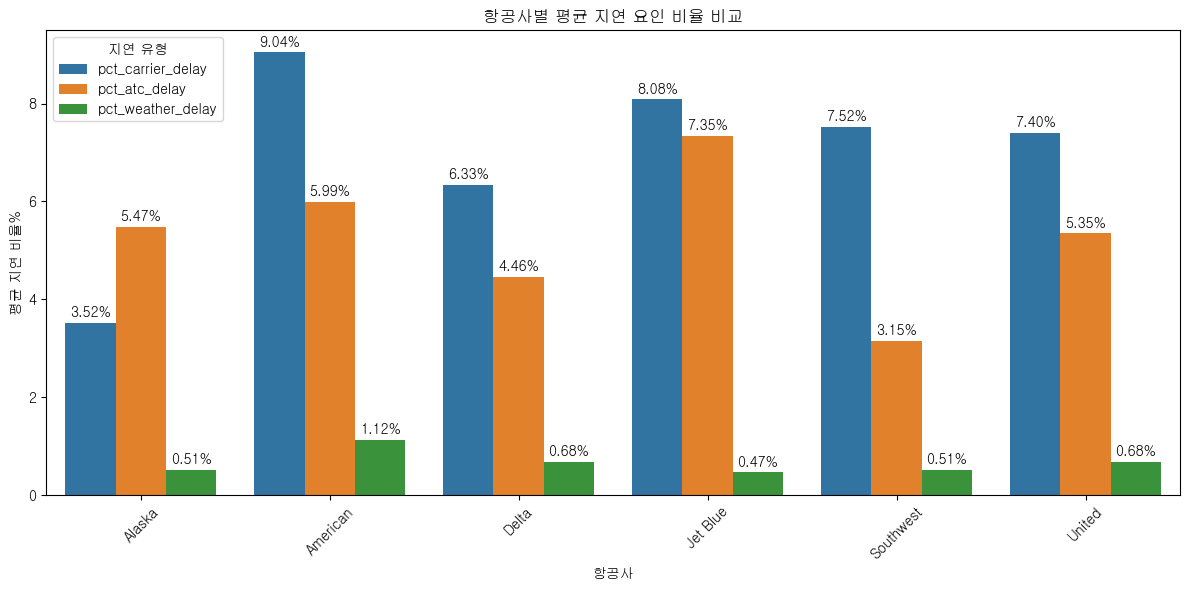

In [19]:
# 항공사별 평균 지연률 계산
mean_delay = df.groupby('airline')[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].mean().reset_index()

# 데이터 형태 변환 (wide → long) for seaborn
mean_delay_melted = mean_delay.melt(id_vars='airline', var_name='Delay_Type', value_name='Mean_Percentage')

# 시각화
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=mean_delay_melted, x='airline', y='Mean_Percentage', hue='Delay_Type')  #hue='Delay_Type': 지연 요인별로 색을 다르게 나눠서 보여주는 기능 
plt.title('항공사별 평균 지연 요인 비율 비교')
plt.ylabel('평균 지연 비율%')
plt.xlabel('항공사')
plt.xticks(rotation=45)
plt.legend(title='지연 유형')

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge', padding=3)  #label_type은 막대위 숫자표시, padding은 숫자와 막대간 간격

plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동으로 간격을 조정
plt.show()

# 항공사별 지연요인 Box Plot



C:\Users\Admin\AppData\Local\Temp\ipykernel_22964\2692928722.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels, showfliers=False)  # 이상치는 숨길 수도 있음


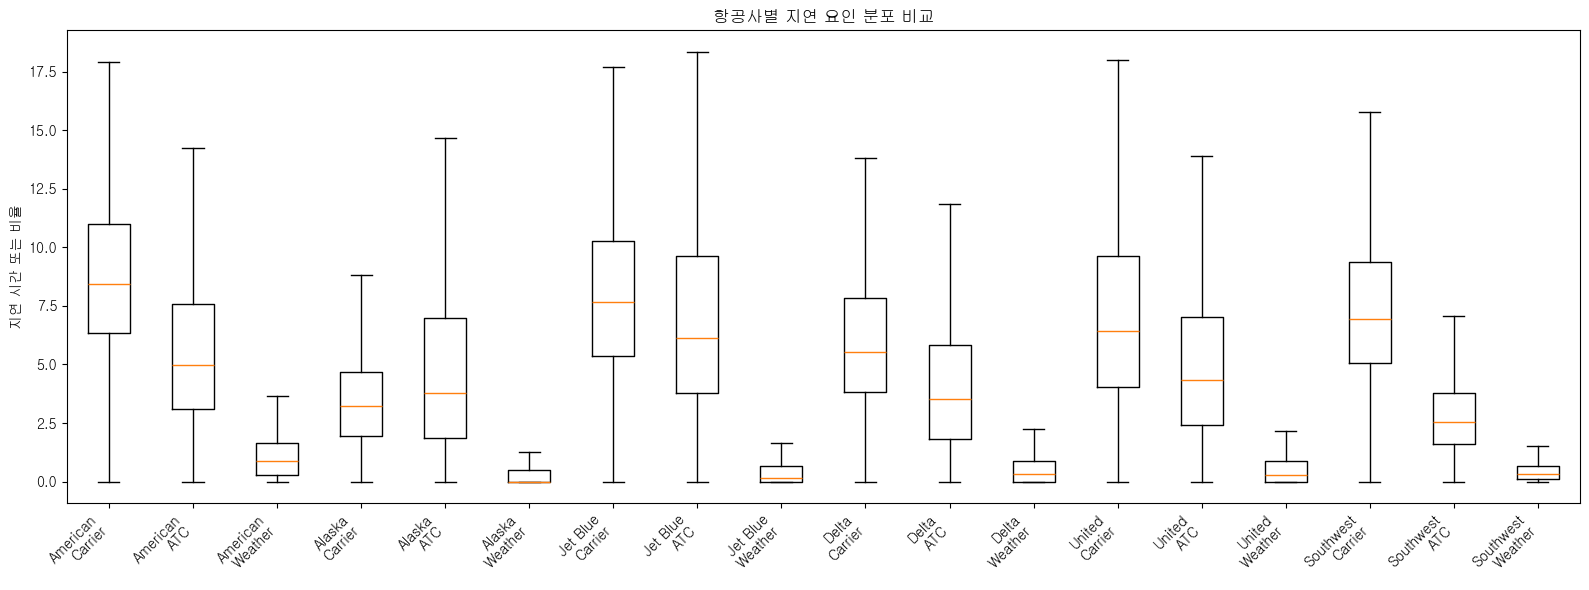

In [20]:
import matplotlib.pyplot as plt

# 항공사 리스트 (고유값)
airlines = df['airline'].unique()

# 그리기 위한 데이터 리스트
data = []

# 항공사별, 지연요인별 데이터 순서대로 수집
labels = []
for airline in airlines:
    data.append(df[df['airline'] == airline]['pct_carrier_delay'])
    labels.append(f'{airline}\nCarrier')
    
    data.append(df[df['airline'] == airline]['pct_atc_delay'])
    labels.append(f'{airline}\nATC')
    
    data.append(df[df['airline'] == airline]['pct_weather_delay'])
    labels.append(f'{airline}\nWeather')

plt.figure(figsize=(16,6))
plt.boxplot(data, labels=labels, showfliers=False)  # 이상치는 숨길 수도 있음

plt.xticks(rotation=45, ha='right')
plt.title('항공사별 지연 요인 분포 비교')
plt.ylabel('지연 시간 또는 비율')
plt.tight_layout()
plt.show()

In [21]:
df

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American
...,...,...,...,...
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest


# 항공사별 지연 요인간 상관계수 

In [22]:
for airline, group_df in df.groupby('airline'):
    print(f"===== 항공사: {airline} =====")
    corr = group_df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].corr()
    print(corr)
    print()

===== 항공사: Alaska =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.067008           0.026046
pct_atc_delay               0.067008       1.000000           0.031309
pct_weather_delay           0.026046       0.031309           1.000000

===== 항공사: American =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.104717           0.078642
pct_atc_delay               0.104717       1.000000           0.027266
pct_weather_delay           0.078642       0.027266           1.000000

===== 항공사: Delta =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           1.000000       0.170228           0.163264
pct_atc_delay               0.170228       1.000000           0.080593
pct_weather_delay           0.163264       0.080593           1.000000

===== 항공사: Jet Blue =====
                   pct_carrier_delay  pct_atc_

In [23]:
for airline, group_df in df.groupby('airline'):
    print(f"===== 항공사: {airline} =====")
    cov = group_df[['pct_carrier_delay', 'pct_atc_delay', 'pct_weather_delay']].cov()
    print(cov)
    print()

===== 항공사: Alaska =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay           6.166400       0.948343           0.073506
pct_atc_delay               0.948343      32.482054           0.202795
pct_weather_delay           0.073506       0.202795           1.291620

===== 항공사: American =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay          17.131875       2.014226           0.357342
pct_atc_delay               2.014226      21.596193           0.139101
pct_weather_delay           0.357342       0.139101           1.205188

===== 항공사: Delta =====
                   pct_carrier_delay  pct_atc_delay  pct_weather_delay
pct_carrier_delay          22.045771       3.488278           0.838060
pct_atc_delay               3.488278      19.047416           0.384537
pct_weather_delay           0.838060       0.384537           1.195206

===== 항공사: Jet Blue =====
                   pct_carrier_delay  pct_atc_